In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import re

In [2]:
msg_df= pd.read_csv("spam.csv",encoding="ISO-8859-1", engine='python')
msg_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
msg_df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [4]:
msg_df.isnull().sum()

v1    0
v2    0
dtype: int64

In [5]:
msg_df.rename(columns={"v2":"msg"},inplace=True)

In [6]:
msg_df

,v1,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
msg_df["v1"].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
msg_df["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

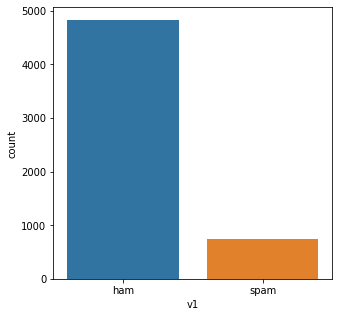

In [9]:
plt.figure(figsize=[5,5])
sns.countplot(x=msg_df['v1'])
plt.show()

## this is an unbalanced dataset

In [10]:
msg_df["length"]=msg_df["msg"].apply( lambda x: len(x))

In [11]:
ham=msg_df[msg_df["v1"]=="ham"]
spam=msg_df[msg_df["v1"]=="spam"]

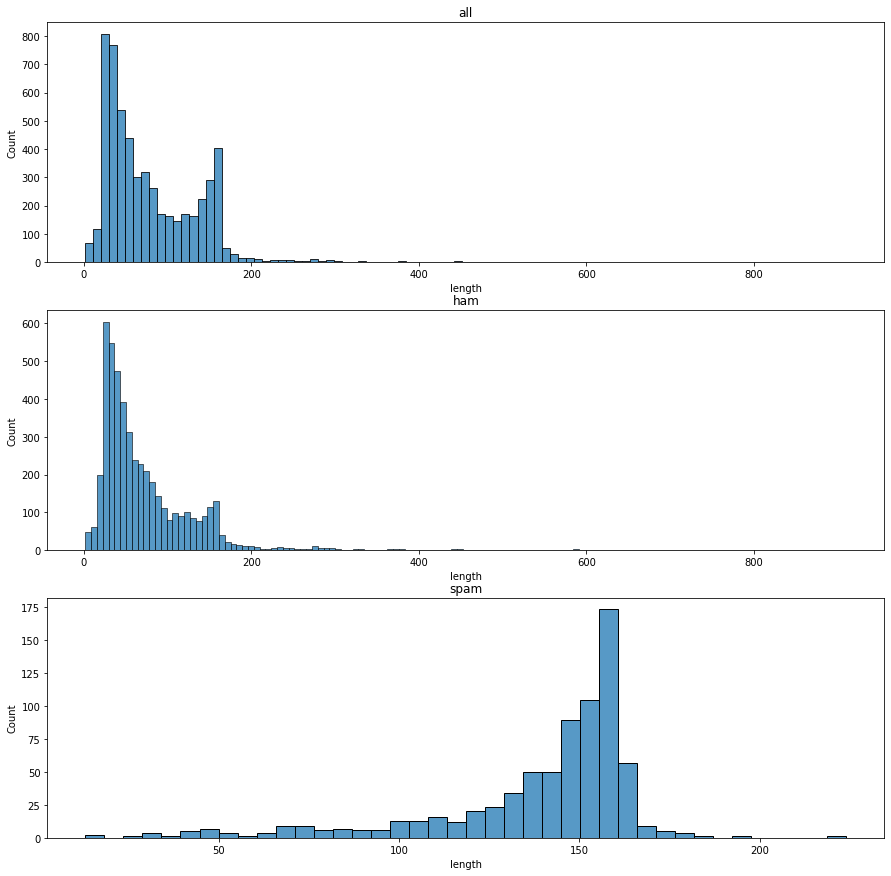

In [12]:
plt.figure(figsize=[15,15])

plt.subplot(311)
sns.histplot(msg_df["length"])
plt.title("all")


plt.subplot(312)
sns.histplot(ham["length"])
plt.title("ham")


plt.subplot(313)
sns.histplot(spam["length"])
plt.title("spam")



plt.show()

## hypothesis test
*H0 :mean length of spam and ham massages are same <br>
*H1 :mean leangth of spam and ham are different

In [13]:
print(ham["length"].mean())
print(spam["length"].mean())

71.02362694300518
138.8661311914324


In [14]:
from scipy import stats
from statsmodels.stats import weightstats as stests

In [15]:
ztest ,pval1 = stests.ztest(x1=spam['length'], x2=ham['length'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

9.53243814044399e-216
reject null hypothesis


 * Hance we are accepting the fact that spam massages are usually longer in length
 

  ## Test preprocessing

In [16]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer=WordNetLemmatizer()
def tprep(text):
    remove=re.sub('[^a-zA-Z]',' ',text)
    remove=remove.lower()
    words=remove.split()
    lemma_words=[lemmatizer.lemmatize(wrd) for wrd in words if wrd not in set(stopwords.words("english"))]
    return ' '.join(lemma_words)

msg_df["msg"]=msg_df["msg"].apply(tprep)

In [17]:
msg_df["v1"]=msg_df["v1"].map({"ham":0,"spam":1})
msg_df

,v1,msg,length
0,0,go jurong point crazy available bugis n great ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry wkly comp win fa cup final tkts st ...,155
3,0,u dun say early hor u c already say,49
4,0,nah think go usf life around though,61
...,...,...,...
5567,1,nd time tried contact u u pound prize claim ea...,161
5568,0,b going esplanade fr home,37
5569,0,pity mood suggestion,57
5570,0,guy bitching acted like interested buying some...,125


## Word vectorization

In [18]:
msgs=msg_df["msg"]

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer()
CV.fit(msgs)
CV.get_feature_names()

['aa',
 'aah',
 'aaniye',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abel',
 'aberdeen',
 'abi',
 'ability',
 'abiola',
 'abj',
 'able',
 'abnormally',
 'aboutas',
 'abroad',
 'absence',
 'absolutely',
 'absolutly',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abuse',
 'abuser',
 'ac',
 'academic',
 'acc',
 'accent',
 'accenture',
 'accept',
 'access',
 'accessible',
 'accidant',
 'accident',
 'accidentally',
 'accommodation',
 'accommodationvouchers',
 'accomodate',
 'accomodations',
 'accordin',
 'accordingly',
 'account',
 'accounting',
 'accumulation',
 'achan',
 'ache',
 'achieve',
 'acid',
 'acknowledgement',
 'acl',
 'acnt',
 'aco',
 'across',
 'act',
 'acted',
 'actin',
 'acting',
 'action',
 'activ',
 'activate',
 'active',
 'activity',
 'actor',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'added',
 'addicted',
 'addie',
 'adding',
 'address',
 'adewale',
 'adi',
 'adjustable',
 'admin',
 'administrator',
 'admirer',
 'admission',
 'admit'

In [20]:
array=CV.transform(msgs).toarray()
vec_df=pd.DataFrame(array,columns=CV.get_feature_names())
vec_df

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zed,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
vec_df["length"]

0       0
1       0
2       0
3       0
4       0
       ..
5567    0
5568    0
5569    0
5570    0
5571    0
Name: length, Length: 5572, dtype: int64

In [27]:
"len" in CV.get_feature_names()

False

In [29]:
vec_df["len"]=msg_df["length"]

In [30]:
vec_df.shape

(5572, 7022)

In [31]:
##input matrix
#vec_df

## output vector
Y=msg_df["v1"]

## Model Training

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,fbeta_score

x_train,x_test,y_train,y_test=train_test_split(vec_df,Y,test_size=.2,random_state=0)

model=MultinomialNB()
model.fit(x_train,y_train)


y_pred=model.predict(x_test)
print("accuracy: ",accuracy_score(y_test,y_pred))
print("fbeta_score: ",fbeta_score(y_test,y_pred,beta=0.5))

matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print(classification_report(y_test,y_pred))

accuracy:  0.9775784753363229
fbeta_score:  0.9382871536523929
[[941   8]
 [ 17 149]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       949
           1       0.95      0.90      0.92       166

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [34]:

model = MultinomialNB()
skf = StratifiedKFold(n_splits=5, random_state=7)
results = cross_val_score(model, vec_df, Y, cv=skf,scoring='f1')
print("f score: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

c:\users\adesh kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


f score: 92.34% (0.96%)


In [35]:
model=MultinomialNB()
model.fit(x_train,y_train)


y_pred=model.predict(x_test)
print("accuracy: ",accuracy_score(y_test,y_pred))
print("fbeta_score: ",fbeta_score(y_test,y_pred,beta=0.5))

matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print(classification_report(y_test,y_pred))

accuracy:  0.9775784753363229
fbeta_score:  0.9382871536523929
[[941   8]
 [ 17 149]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       949
           1       0.95      0.90      0.92       166

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [36]:
import pickle

In [37]:
# save the model to disk
filename = 'spam_clf_model.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)


0.9775784753363229


In [38]:
filename = 'vetorizer.pkl'
pickle.dump(CV, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.get_feature_names()


['aa',
 'aah',
 'aaniye',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abel',
 'aberdeen',
 'abi',
 'ability',
 'abiola',
 'abj',
 'able',
 'abnormally',
 'aboutas',
 'abroad',
 'absence',
 'absolutely',
 'absolutly',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abuse',
 'abuser',
 'ac',
 'academic',
 'acc',
 'accent',
 'accenture',
 'accept',
 'access',
 'accessible',
 'accidant',
 'accident',
 'accidentally',
 'accommodation',
 'accommodationvouchers',
 'accomodate',
 'accomodations',
 'accordin',
 'accordingly',
 'account',
 'accounting',
 'accumulation',
 'achan',
 'ache',
 'achieve',
 'acid',
 'acknowledgement',
 'acl',
 'acnt',
 'aco',
 'across',
 'act',
 'acted',
 'actin',
 'acting',
 'action',
 'activ',
 'activate',
 'active',
 'activity',
 'actor',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'added',
 'addicted',
 'addie',
 'adding',
 'address',
 'adewale',
 'adi',
 'adjustable',
 'admin',
 'administrator',
 'admirer',
 'admission',
 'admit'

# model training done